# DSCI 521: Data Analysis and Interpretation <br> Term Project Phase 1: Scoping an analytics project

#                                SCREENING FOR CHRONIC KIDNEY DISEASE

Sina Esmaeilpour Charandabi | se456@drexel.edu

I have always been interested in discovering hidden patterns behind mechanisms and formulating actions, a passion I tried to pursue by choosing mechanical engineering as my major. During my master’s degree, I gained proficiency in numerical programming with MATLAB.
After few years of experience at engineering positions, I decided to solidify my managerial knowledge by earning an MBA degree. Perceiving the essential role of data analytics in business administration, I decided to pursue another master’s in business analytics; develop my coding skills in R, Python, and SQL, and obtain data interpretation and visualization skills by SAS, SPSS and Tableau.
I would like to gain more technical skills through getting engaged in challenging tasks which help me put theoretical insights into action.

# Abstract

>_The purpose of this study is to create an efficient screening tool to identify patients at risk for chronic kidney disease (CKD). Despite the wide availability and low cost of a test for CKD based on one or more blood samples, studies have shown that many in the at-risk population have not been tested. One reason for this is that the awareness of CKD is low. Given the proven benefits of early detection and treatment, the need for some kind of screening tool is clear. Employing classification techniques, we will study how efficiently high-risk patients can be identified using easily obtainable patient data._

# Introduction

Chronic kidney disease (CKD) is a progressive condition that results in significant morbidity and mortality. Because of the important role kidneys play in maintaining homeostasis, CKD can affect almost every body system. Early recognition and intervention are essential to solving disease progression, maintaining quality of life , and improving outcomes.

While anyone at any age can develop chronic kidney disease (CKD), a number of risk factors have been identified that may lead to possible problems with your kidneys:

* **Diabetes**. Diabetes is the leading cause of CKD. If you have diabetes, talk with your doctor about how to keep your blood glucose as close to normal as possible to ensure your diabetes is under control.

* **Hypertension**. Hypertension, also called high blood pressure, is the second-highest cause of CKD. Keep your blood pressure under control. A number of effective medications are available to help you with this task. Your doctor will help you to determine which medication is right for you.

* **Cardiovascular disease**. In addition to hypertension, other diseases of the heart and blood vessels may increase your risk for kidney disease. People who have had heart attacks or strokes, congestive heart failure, coronary artery disease, or peripheral vascular disease need to be monitored carefully for kidney problems.

* **Family history of kidney disease**. Some kidney diseases are genetic. People with a mother, father, brother, or sister who has had a kidney disease are more likely to develop problems with their kidneys.

* **Age**. People 60 years and older are at a higher risk for developing CKD.

* **Race**. People belonging to certain ethnic groups, such as First Nations (Canadian aboriginal peoples) and Pacific Islanders, are at a higher risk for developing this disease.

Among these factors, the two main ones are diabetes and high blood pressure, being responsible for up to two-thirds of the cases. Due to the lack of awareness regarding CKD, it is essential to implement methods whereby patients more prone to CKD are recognized at the initial stages of the disease. In this regard, this study will try to evaluate the usability of classification techniques over data regularly obtained by family physicians, thus facilitating early therapy and monitoring disease progression. 

# Data

Since 1975, the National Center for Health Statistics of the Centers for Disease Control and Prevention has conducted nationwide surveys of U.S. adults. Using trained personnel, the center collected a wide variety of demographic and health information using direct interviews, examinations, and blood samples. The data set consists of selected information from 8,819 adults 20 years of age or older taken from the 1999 to 2000 and 2001 to 2002 surveys. The dataset is currently available at the following address from Darden Business Publishing: http://store.darden.virginia.edu/screening-for-chronic-kidney-diseaseDarden   

34 variables are included in the data set, where CDK, a 0/1 dummy variable, is the variable of interest,indicating whether or not a subject had CKD. Varibles, as defined in Table 1, are demographic in nature (variables 0 through 10), or were collected during the physical exam (variables 11 through 21), or aquired on self-reported health histories (variables 22 through 33). 

The first 50 observations from the dataset are represented in Table 2. Table 3 reports descriptive statistics for each of the numerical variables in dataset. 

The challenge is to come up with some solution to use the first 33 variables to predict the 34<sup>th</sup> one, denoting the presence or absence of CKD in the object. However, It is also important to note that because the study population is not a random sample of U.S. adults, any predictions suggested by current study requires further validation before utilizing for actual decision-making. 

In [1]:
import pandas as pd

v_def = pd.read_csv("./data/variables.csv", sep = ",", header = 0)
pd.set_option('max_colwidth', 120)
print('            Table 1. Variable Definition')
v_def[['Variable','Definition']]

            Table 1. Variable Definition


,Variable,Definition
0,ID,Identification number
1,Age,Age (years)
2,Female,1 if female
3,Racegrp,"Self-reported race/ethnic group (white, black, Hispanic, other)"
4,Educ,1 if more than high school
5,Unmarried,1 if unmarried
6,Income,1 if household income is above the median
7,CareSource,"Self-reported source of medical care (Dr./HMO, clinic, noplace, other)"
8,Insured,1 if covered by health insurance
9,Weight,Weight (kg)


In [2]:
ckd_dataset = pd.read_csv("./data/ckd_dataset.csv", sep = ",", header = 0)
print('                                     Table 2. The first 50 Observations')
ckd_dataset.head(50)

                                     Table 2. The first 50 Observations


,ID,Age,Female,Racegrp,Educ,Unmarried,Income,CareSource,Insured,Weight,...,Hypertension,Fam Hypertension,Diabetes,Fam Diabetes,Stroke,CVD,Fam CVD,CHF,Anemia,CKD
0,1,65,1,white,0.0,0.0,1.0,other,1.0,56.0,...,0.0,0,0.0,1,0.0,1.0,0.0,0.0,0.0,0.0
1,2,36,1,hispa,0.0,NaN,1.0,noplace,0.0,60.2,...,0.0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,66,1,white,0.0,1.0,0.0,noplace,1.0,83.9,...,0.0,0,1.0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,54,1,white,1.0,0.0,0.0,DrHMO,1.0,69.4,...,0.0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
4,5,63,1,black,0.0,0.0,NaN,clinic,1.0,73.1,...,1.0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
5,6,26,0,white,1.0,0.0,0.0,DrHMO,1.0,119.3,...,0.0,1,0.0,0,0.0,0.0,1.0,0.0,0.0,0.0
6,7,66,0,black,1.0,0.0,0.0,DrHMO,0.0,85.1,...,1.0,0,0.0,0,0.0,0.0,1.0,0.0,0.0,0.0
7,8,59,1,white,1.0,1.0,0.0,DrHMO,1.0,69.9,...,0.0,1,1.0,1,0.0,0.0,1.0,0.0,0.0,0.0
8,9,53,1,white,1.0,0.0,1.0,DrHMO,1.0,75.2,...,1.0,1,0.0,0,0.0,0.0,1.0,0.0,0.0,0.0
9,10,78,1,black,0.0,1.0,0.0,DrHMO,1.0,47.6,...,1.0,0,1.0,1,1.0,1.0,1.0,NaN,0.0,0.0


In [3]:
print('There are '+str(ckd_dataset.shape[0])+' observations in the dataset.')

There are 8819 observations in the dataset.


In [4]:
nonrow=sum([True for idx,row in ckd_dataset.iterrows() if any(row.isnull())])
print('There are '+str(nonrow)+' observations with missing values in the dataset.')

There are 4683 observations with missing values in the dataset.


In [6]:
print ('Varible     Number of missing values') 
len(ckd_dataset) - ckd_dataset.count()

Varible     Number of missing values


ID                     0
Age                    0
Female                 0
Racegrp                0
Educ                  20
Unmarried            452
Income              1166
CareSource             0
Insured              113
Weight               194
Height               191
BMI                  290
Obese                290
Waist                314
SBP                  308
DBP                  380
HDL                   17
LDL                   18
Total Chol            16
Dyslipidemia           0
PVD                    0
Activity              10
PoorVision           567
Smoker                 0
Hypertension          80
Fam Hypertension       0
Diabetes               2
Fam Diabetes           0
Stroke                11
CVD                   23
Fam CVD              419
CHF                   36
Anemia                 6
CKD                 2819
dtype: int64

As appears, almost half of the current dataset includes objects with at least one missing value for any variable in the dataset. Thus, deciding to limit the sample to only objects with non-missing values, will reduce its size remarkebly.

However, it can be seen that the number of missing values for each variable is, on average, less than 10% of the size of the sample. In this regard, Income and CKD are two variables associated with larger number of missing values, around 13% and 32% of the objects, respectively.

Considering that CKD is the the variable to predict, we are required to study on objects associated with non-missing values for CKD.

In [11]:
print('                                     Table 3. Descriptive Statistics for continuous variables')
ckd_dataset[['Age','Weight','Height','BMI','Waist','SBP','DBP','HDL','LDL','Total Chol','Activity']].describe().T

                                     Table 3. Descriptive Statistics for continuous variables


,count,mean,std,min,25%,50%,75%,max
Age,8819.0,49.358204,18.828726,20.00,33.000,47.00,65.00,85.00
Weight,8625.0,79.094342,19.410707,25.60,65.400,76.70,89.50,193.30
Height,8628.0,167.026854,10.099770,130.40,159.675,166.60,174.20,200.10
BMI,8529.0,28.294348,6.186076,12.04,24.080,27.36,31.36,66.44
Waist,8505.0,96.839976,15.099678,58.50,86.200,96.30,106.10,173.40
SBP,8511.0,125.810833,21.034786,72.00,111.000,122.00,136.00,233.00
DBP,8439.0,71.508947,12.663171,10.00,64.000,72.00,79.00,132.00
HDL,8802.0,51.828334,15.786402,8.00,41.000,49.00,60.00,160.00
LDL,8801.0,152.571299,42.994626,27.00,123.000,149.00,177.00,684.00
Total Chol,8803.0,204.403385,42.797748,72.00,176.000,201.00,230.00,727.00


In order to further investigate the difference among objects in the dataset, descriptive statistics is reported in Table 4 and Table 5, this time for patients not associated with CKD and those who are. 

Relying on the mean values, the main difference seems to be related to age which is higher for objects with CKD while other parameters aren't remarkebly different, compared to age, across the two groups. 

It is also important to notice the disproportionate ratio between the size of two groups; objects without CKD are around 12 times larger than the other group. One solution to address this concern can be random sampling to balance the ratio. 

In [52]:
print('                                     Table 4. Descriptive Statistics for objects without CKD')
ckd_dataset1=ckd_dataset[ckd_dataset['CKD']==0]
ckd_dataset1[['Age','Weight','Height','BMI','Waist','SBP','DBP','HDL','LDL','Total Chol','Activity']].describe().T

                                     Table 4. Descriptive Statistics for objects without CKD


,count,mean,std,min,25%,50%,75%,max
Age,5536.0,47.154263,17.901579,20.00,32.00,45.00,62.00,85.00
Weight,5432.0,79.169323,19.603250,33.70,65.20,76.70,89.70,193.30
Height,5433.0,167.254997,10.121268,130.40,160.00,166.90,174.40,200.10
BMI,5377.0,28.236463,6.223089,14.42,24.01,27.25,31.24,66.44
Waist,5365.0,96.537763,15.236286,58.60,85.80,95.80,105.80,173.40
SBP,5352.0,124.266256,20.141694,73.00,110.00,121.00,134.00,233.00
DBP,5318.0,71.859722,12.239963,10.00,64.00,72.00,79.00,132.00
HDL,5529.0,51.968168,15.788893,8.00,41.00,49.00,60.00,160.00
LDL,5529.0,151.848255,42.456822,33.00,122.00,148.00,177.00,560.00
Total Chol,5531.0,203.821370,42.037793,80.00,176.00,200.00,229.00,606.00


In [53]:
print('                                     Table 5. Descriptive Statistics for objects with CKD')
ckd_dataset2=ckd_dataset[ckd_dataset['CKD']==1]
ckd_dataset2[['Age','Weight','Height','BMI','Waist','SBP','DBP','HDL','LDL','Total Chol','Activity']].describe().T

                                     Table 4. Descriptive Statistics for objects with CKD


,count,mean,std,min,25%,50%,75%,max
Age,464.0,73.051724,11.709474,21.00,67.000,76.00,82.00,85.00
Weight,435.0,77.737563,19.252928,39.00,64.050,75.60,88.70,166.00
Height,428.0,165.288785,10.414434,138.40,157.600,164.55,173.20,199.80
BMI,417.0,28.345444,5.984894,16.03,24.490,27.45,31.42,54.65
Waist,420.0,100.100476,14.435481,63.00,90.975,100.05,109.25,157.70
SBP,442.0,141.466063,25.278135,72.00,123.000,137.50,156.00,219.00
DBP,430.0,67.730233,14.280630,20.00,58.250,68.00,76.00,113.00
HDL,463.0,50.082073,16.175504,24.00,39.000,47.00,57.00,121.00
LDL,463.0,157.198704,44.024878,51.00,127.000,155.00,181.00,328.00
Total Chol,463.0,207.280778,44.977327,75.00,176.500,205.00,234.50,370.00


In [92]:
print('In the dataset there are', len(ckd_dataset2), 'observations with CKD and', len(ckd_dataset1),'observations without CKD.')

In the dataset there are 464 observations with CKD and 5536 observations without CKD.


Figure 1 and Figure 2 represent the variation across the race gruops and source of medical care, respectively, for both groups.
What is meritting attention is that most objects used HMO plan as the care source, regradless of their status in terms of CKD. 

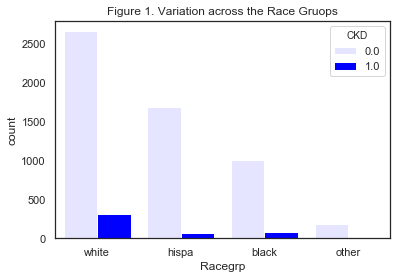

In [100]:
import seaborn as sns

sns.set(style="white")
_=sns.countplot(x='Racegrp', hue='CKD', data = ckd_dataset, color = 'blue', saturation=2).set_title('Figure 1. Variation across the Race Gruops')

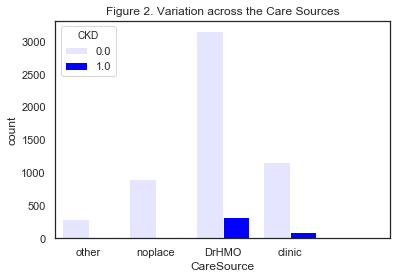

In [101]:
import seaborn as sns

sns.set(style="white")
_=sns.countplot(x='CareSource', hue='CKD', data = ckd_dataset, color = 'blue', saturation=2) .set_title('Figure 2. Variation across the Care Sources')

Finally, as denoted by the pearson correlation matrix in Figure 3, among continuous variables discussed through Table 3 to Table 5, there are several pairs of highly correlated variables, including 'BMI', 'Waist', 'Total Chol', in their correlations with 'Age', 'Weight', and 'LDL', respectively.

In order to have a more reliable results, it is essential to compare the results of the analysis in presence and absenece of highly correlated pairs.

 Figure 3. Correlation between Continuous Variables



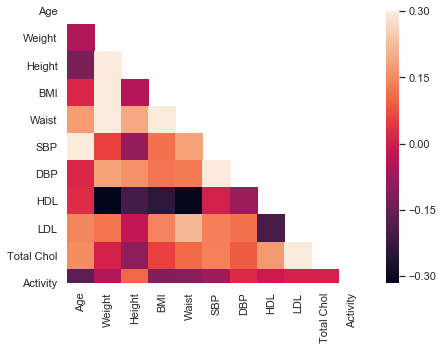

In [102]:
from matplotlib import pyplot as plt
import numpy as np

ckd_dataset3=ckd_dataset[['Age','Weight','Height','BMI','Waist','SBP','DBP','HDL','LDL','Total Chol','Activity']]
corr_mat=ckd_dataset3.corr()

mask = np.zeros_like(corr_mat)
mask[np.triu_indices_from(mask)] = True
print(' Figure 3. Correlation between Continuous Variables\n')
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(7, 5))
    ax = sns.heatmap(corr_mat, mask=mask, vmax=.3, square=True)

In [145]:
corr_mat.style.background_gradient(cmap='coolwarm').set_precision(2)

,Age,Weight,Height,BMI,Waist,SBP,DBP,HDL,LDL,Total Chol,Activity
Age,1,-0.046,-0.12,0.019,0.18,0.55,0.019,0.026,0.15,0.16,-0.17
Weight,-0.046,1,0.46,0.86,0.87,0.057,0.19,-0.31,0.12,0.0085,-0.044
Height,-0.12,0.46,1,-0.041,0.2,-0.085,0.16,-0.2,-0.021,-0.095,0.11
BMI,0.019,0.86,-0.041,1,0.87,0.12,0.12,-0.24,0.14,0.056,-0.11
Waist,0.18,0.87,0.2,0.87,1,0.18,0.13,-0.31,0.22,0.11,-0.11
SBP,0.55,0.057,-0.085,0.12,0.18,1,0.34,0.0048,0.13,0.14,-0.074
DBP,0.019,0.19,0.16,0.12,0.13,0.34,1,-0.075,0.12,0.089,0.022
HDL,0.026,-0.31,-0.2,-0.24,-0.31,0.0048,-0.075,1,-0.2,0.17,-0.008
LDL,0.15,0.12,-0.021,0.14,0.22,0.13,0.12,-0.2,1,0.93,0.01
Total Chol,0.16,0.0085,-0.095,0.056,0.11,0.14,0.089,0.17,0.93,1,0.0071


In [172]:
high_corr=[]
for i in ckd_dataset3.columns:
    for j in ckd_dataset3.columns:
        if np.abs(corr_mat.loc[i,j])>0.6 and np.abs(corr_mat.loc[i,j])<1:
            high_corr.append((i,j,corr_mat.loc[i,j]))
for i in high_corr:
    for j in high_corr:        
        if i[2]==j[2] and i!=j:
               high_corr.remove(j) 
print('Highly correlated pairs are:')
high_corr    

Highly correlated pairs are:


[('Weight', 'BMI', 0.8625528129821617),
 ('Weight', 'Waist', 0.8725822004036159),
 ('BMI', 'Waist', 0.8724049214023242),
 ('LDL', 'Total Chol', 0.9322885659173127)]

# Method

What needs to be analyzed in the next steps is to determine the statistical significance of difference that variables, including age, make among objects and figure out which combinations of these variables is capable of classifying CKD-related objects more reliably.   

Regarding the binary nature of the output variable (CKD), logistic regression, decision tree, random forest, and k-nearest neighbors seem to be appropriate classification methods for the current study. 

Additionally, due to the large number of input variables, using components or combinations of several variables closely-related to each other is another step for variable reduction which will be studied in the following sections.

# Term Project Phase 2: Project Implementation and Presentation

# Data Preprocessing 

### Missing Values and Categorical Variables

As discussed before, we first need to restrict data to only observations with non-missing values of CKD which is the variable of interest. 

In [3]:
df0=ckd_dataset.dropna(how='any', subset=['CKD'])
len(df0)

6000

In [14]:
print ('Varible    % of missing values') 
(len(df0) - df0.count())*100/len(df0)

Varible    % of missing values


ID                   0.000000
Age                  0.000000
Female               0.000000
Racegrp              0.000000
Educ                 0.250000
Unmarried            5.016667
Income              13.200000
CareSource           0.000000
Insured              1.300000
Weight               2.216667
Height               2.316667
BMI                  3.433333
Obese                3.433333
Waist                3.583333
SBP                  3.433333
DBP                  4.200000
HDL                  0.133333
LDL                  0.133333
Total Chol           0.100000
Dyslipidemia         0.000000
PVD                  0.000000
Activity             0.133333
PoorVision           6.266667
Smoker               0.000000
Hypertension         0.883333
Fam Hypertension     0.000000
Diabetes             0.016667
Fam Diabetes         0.000000
Stroke               0.100000
CVD                  0.216667
Fam CVD              4.716667
CHF                  0.433333
Anemia               0.050000
CKD       

As shown above in the selected sample from the origional dataset, excluding "Income" which owns the most missing records (13%), the percentage of missing values for all remaining parameters is still less than 10%.

It is seen that the only two categorical variables in data ('CareSource', 'Racegrp') have non-missing values. Thus, the only concern is deciding on imputing the missing values of numerical variables. However, in order to have a more conservative approach at the beginning, we need to focus on observations with non-missing values, and don't implement any imputation method.

In [4]:
# Drop any observation with NAs in dataset
df=df0.dropna()
len(df)

4136

In [5]:
print('Values of the dependent variable before dropping observations with missing records')
print('')
print(df0['CKD'].value_counts())

Values of the dependent variable before dropping observations with missing records

0.0    5536
1.0     464
Name: CKD, dtype: int64


Next, we need to create dummy variables from categorical parameters ('CareSource', 'Racegrp'). 

In [5]:
# Create dummy variables
dummy_cat_df = pd.get_dummies(df[list(set(df.dtypes[df.dtypes == object].index))], drop_first=True) 
dummy_cat_df.head()

,CareSource_DrHMO,CareSource_clinic,CareSource_noplace,CareSource_other,Racegrp_hispa,Racegrp_other,Racegrp_white
0,0,0,0,1,0,0,1
2,0,0,1,0,0,0,1
3,1,0,0,0,0,0,1
5,1,0,0,0,0,0,1
6,1,0,0,0,0,0,0


In [6]:
# Adds the newly created dummy variables instead
df = pd.concat([df, dummy_cat_df], axis = 1) 

In [7]:
# Drops categorical variables from the df
df = df.drop(list(set(df.dtypes[df.dtypes == object].index)), axis = 1) 

In [8]:
df.columns

Index(['ID', 'Age', 'Female', 'Educ', 'Unmarried', 'Income', 'Insured',
       'Weight', 'Height', 'BMI', 'Obese', 'Waist', 'SBP', 'DBP', 'HDL', 'LDL',
       'Total Chol', 'Dyslipidemia', 'PVD', 'Activity', 'PoorVision', 'Smoker',
       'Hypertension', 'Fam Hypertension', 'Diabetes', 'Fam Diabetes',
       'Stroke', 'CVD', 'Fam CVD', 'CHF', 'Anemia', 'CKD', 'CareSource_DrHMO',
       'CareSource_clinic', 'CareSource_noplace', 'CareSource_other',
       'Racegrp_hispa', 'Racegrp_other', 'Racegrp_white'],
      dtype='object')

In [69]:
df.head()

,ID,Age,Female,Educ,Unmarried,Income,Insured,Weight,Height,BMI,...,CHF,Anemia,CKD,Racegrp_hispa,Racegrp_other,Racegrp_white,CareSource_DrHMO,CareSource_clinic,CareSource_noplace,CareSource_other
0,1,65,1,0.0,0.0,1.0,1.0,56.0,162.1,21.31,...,0.0,0.0,0.0,0,0,1,0,0,0,1
2,3,66,1,0.0,1.0,0.0,1.0,83.9,162.5,31.77,...,0.0,0.0,0.0,0,0,1,0,0,1,0
3,4,54,1,1.0,0.0,0.0,1.0,69.4,160.5,26.94,...,0.0,0.0,0.0,0,0,1,1,0,0,0
5,6,26,0,1.0,0.0,0.0,1.0,119.3,193.2,31.96,...,0.0,0.0,0.0,0,0,1,1,0,0,0
6,7,66,0,1.0,0.0,0.0,0.0,85.1,172.1,28.73,...,0.0,0.0,0.0,0,0,0,1,0,0,0


In [10]:
print('Values of the dependent variable after dropping observations with missing records')
print('')
print(df['CKD'].value_counts())

Values of the dependent variable after dropping observations with missing records

0.0    3870
1.0     266
Name: CKD, dtype: int64


### Normalization 

In [9]:
numerical_val=['Age','Weight','Height','BMI','Waist','SBP','DBP','HDL','LDL','Total Chol','Activity']
for i in numerical_val:
    df[i]=(df[i]-df[i].mean())/df[i].std()

In [95]:
df[numerical_val].head()

,Age,Weight,Height,BMI,Waist,SBP,DBP,HDL,LDL,Total Chol,Activity
0,0.940455,-1.228263,-0.565902,-1.128022,-0.873489,0.535083,-0.059294,-0.236442,2.288058,2.213788,1.195469
2,0.995426,0.226102,-0.525986,0.584256,1.079441,-0.463115,-1.210649,-0.491010,1.389246,1.214221,-1.291684
3,0.335778,-0.529751,-0.725566,-0.206404,-1.249560,-0.712664,-1.210649,1.418251,0.088333,0.619240,-0.048107
5,-1.203399,2.071426,2.537561,0.615358,1.389535,0.235624,-0.141533,-0.554652,0.159291,-0.047138,-0.048107
6,0.995426,0.288656,0.431996,0.086615,0.155758,0.634903,1.667740,-0.681936,-0.219156,-0.475524,1.195469


# Making Predictions and Model Assessment

In the following, we will fit four different classifying models, logistic regression, decision tree, random forest, and k-nearest neighbors to compare their performance. 

This section will be followed in two cases. First, we creat and assess models using all observations we have restricted the dataset to them so far. In this case, dataset is largely imbalanced due to the presence of notably larger portion of healthy objects.

Second, we will balance data by doensampling the number of healthy objects, thus making it equivalent to the number of CKD-affected objects.

In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, precision_score, recall_score
import numpy as np

In [11]:
# Creating models
def Screen_CKD(IVs, DV): # IVs: Independent variables, DV: Dependent variable
    
    # split data to training and testing samples
    X_train, X_test, Y_train, Y_test = train_test_split(IVs, DV, test_size=0.33, random_state=42)
    
    # fitting models
    
    # Logistic Regression
    lr = LogisticRegression(random_state=0, solver='lbfgs', multi_class='ovr')
    lr.fit(X_train, Y_train)
    
    # Decision Trees
    dt = DecisionTreeClassifier(criterion = 'gini', splitter='best', max_depth=15)
    dt.fit(X_train, Y_train)
    
    # Random Forests
    rf = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=0)
    rf.fit(X_train, Y_train)
    
    # K-NN
    knn = KNeighborsClassifier(n_neighbors = 5)
    knn.fit(X_train, Y_train)
    
    return lr, dt, rf, knn, X_test, Y_test 

In [12]:
# Making prediction
def Pred_CKD(model_lr, model_dt, model_rf, model_knn, X_test):
    # predicts the Y given the fitted model lr
    pred_Y_lr =model_lr.predict(X_test)

    # predicts the Y given the fitted model dt
    pred_Y_dt =model_dt.predict(X_test)

    # predicts the Y given the fitted model rf
    pred_Y_rf =model_rf.predict(X_test)

    # predicts the Y given the fitted model dt
    pred_Y_knn =model_knn.predict(X_test)
    
    return pred_Y_lr, pred_Y_dt, pred_Y_rf, pred_Y_knn

In [13]:
# computes the confusion matrix and performence indicators
def get_performance(actual_Y, pred_Y):
    cm = confusion_matrix(actual_Y, pred_Y) # c00: TN, , c01:FP, c10: FN, c11: TP  
    total = sum(sum(cm))
    accuracy = (cm[0,0]+cm[1,1])/total  
    #sensitivity = cm[1,1]/(cm[1,0]+cm[1,1]) #TP/(TP+FN)
    #specificity = cm[0,0]/(cm[0,0]+cm[0,1]) #TN/(TN+FP)
    Precision=precision_score(pred_Y, actual_Y)
    Recall=recall_score(pred_Y, actual_Y)
    F1_Score=f1_score(pred_Y, actual_Y)
    FPR=cm[0,1]/(cm[0,0]+cm[0,1]) #FP/(TN+FP)
    #miss_rate=1-Recall #FN/(TP+FN)
    
    return accuracy, FPR, Precision, Recall, F1_Score

In [14]:
# Builds a dataframe using the performance indicators so that we can compare the models easily
def Perf_CKD(Y_test, pred_Y_lr, pred_Y_dt, pred_Y_rf, pred_Y_knn):
  
    # Performance measures for model lr
    accuracy_lr, FPR_lr, Precision_lr, Recall_lr, F1_Score_lr = get_performance(Y_test, pred_Y_lr)

    # Performance measures for model dt
    accuracy_dt, FPR_dt, Precision_dt, Recall_dt, F1_Score_dt = get_performance(Y_test, pred_Y_dt)

    # Performance measures for model rf
    accuracy_rf, FPR_rf, Precision_rf, Recall_rf, F1_Score_rf = get_performance(Y_test, pred_Y_rf)

    # Performance measures for model knn
    accuracy_knn, FPR_knn, Precision_knn, Recall_knn, F1_Score_knn = get_performance(Y_test, pred_Y_knn)

    perf = pd.DataFrame([accuracy_lr, accuracy_dt,accuracy_rf,accuracy_knn], 
                        columns = ['Accuracy'], 
                        index = ['Logistic Regression', 'Decision Trees', 'Random Forest','K-NN'])
                                
    perf['FPR'] = np.asarray([FPR_lr, FPR_dt, FPR_rf, FPR_knn])

    perf['Precision'] = np.asarray([Precision_lr, Precision_dt, Precision_rf, Precision_knn])

    perf['Recall'] = np.asarray([Recall_lr, Recall_dt, Recall_rf, Recall_knn])

    perf['F1_Score'] = np.asarray([F1_Score_lr, F1_Score_dt, F1_Score_rf, F1_Score_knn])
    
    return perf

### 1. Unbalanced Data

In this section, we will assess models given three different considerations:

* All variables are included in the model
* Highly-correlated variables are excluded
* Principle components are created and implemented
* Variables previously studied by other studies are kept 

<h6>1.1. Inclusion of All Variables</h6>

In [17]:
# ID must be excluded from the analysis because obviously it doesn't have any exploratory power. 
input_var  = set(df.columns) - set(['CKD','ID'])
X = df[input_var]
Y = df['CKD']

In [18]:
# Fitting models
lr, dt, rf, knn, X_test, Y_test = Screen_CKD(X,Y)

In [19]:
# Making predictions
pred_lr, pred_dt, pred_rf, pred_knn = Pred_CKD(lr, dt, rf, knn, X_test)

In [20]:
# Assessig performance
print('Table 5. Comparison between Models')
Perf_CKD(Y_test, pred_lr, pred_dt, pred_rf, pred_knn)

Table 5. Comparison between Models


,Accuracy,FPR,Precision,Recall,F1_Score
Logistic Regression,0.927473,0.013333,0.088889,0.320000,0.139130
Decision Trees,0.893040,0.060392,0.233333,0.214286,0.223404
Random Forest,0.934066,0.000784,0.011111,0.500000,0.021739
K-NN,0.929670,0.007059,0.033333,0.250000,0.058824


As indicated above, in terms of the accuracy of classification, all models perform decently with around 90% of accuracy; however, it is not surprising because the sample is heavily imbalanced between CKD-affected objects and healthy ones where the size of healthy objects is ten times larger than the size of other group.

Accordingly, one may not be surprised given these small ratios of false positive ratios (FPR), associated with cases falsely diognosed with CKD while they are healthy. Because even by a completely random sampling, there is around 90% chance of classifying an object as healthy. 

Random forest and logistic regression reveal the highest recall (sensitivity) ratios among the 4 models (50% and 32% respectively) in addition that they also represent the highest level of accuracy (93.40% and 92.74% respectively). On the other hand, decision trees shows the weakest performance as opposed to other models.   

Thus, in this most likely situation, where CKD is not expected to be prevalent among the objects (i.e. less than 50% of objects are affected), there is not actually any cocern regarding the falsely screening health people as those affected by CKD (FPR ~ 0.00 %) and up to 50% of CKD-Affected objects are expected to be classified correctly, as suggested by the random forest model. The corresponding values when logistic regression is employed are 1.3% and 32%, respectively.


<h6>1.2. Excluding highly-correlated variables</h6> 

Given much smaller ratios of precision, recall, and particularly f1 score, he inclusion of all variables in the classification algorithm might have impacted the efficiency of screening procedure.

As discussed previously, HDL and Activity are the two most highly correlated variables with others. In addition, unlike race, care source seems not to represent a meaningful difference across the defined classes. Thus, we exclude these three variables (or the corresponding dummies created later) and run the models again to compare any possible difference.

In [21]:
input_var  = set(df.columns) - set(['CKD','ID',
                                    'BMIL','Waist','Total Chol'])
X = df[input_var]
Y = df['CKD']

In [22]:
# Fitting models
lr, dt, rf, knn, X_test, Y_test = Screen_CKD(X,Y)

In [23]:
# Making predictions
pred_lr, pred_dt, pred_rf, pred_knn = Pred_CKD(lr, dt, rf, knn, X_test)

In [24]:
# Assessig performance
print('Table 6. Comparison between Models after removing highly-correlated pairs')
Perf_CKD(Y_test, pred_lr, pred_dt, pred_rf, pred_knn)

Table 6. Comparison between Models after removing highly-correlated pairs


C:\Users\Goldenhelp.ir\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,Accuracy,FPR,Precision,Recall,F1_Score
Logistic Regression,0.926007,0.014118,0.077778,0.280000,0.121739
Decision Trees,0.898168,0.054118,0.222222,0.224719,0.223464
Random Forest,0.934066,0.000000,0.000000,0.000000,0.000000
K-NN,0.926740,0.010980,0.044444,0.222222,0.074074


As indicated by Table 6., dropping of highly-correlated variables affects the performance of logistic regression and K_NN models negatively (between 8% to 12% decrease in FPR, recall, and f1 score values). On the other hand, random forest now failes to propose a meaningful classification result and decision trees shows a slight improvement (5%) in FPR and recall rations while its f1 score remains the same. 

Thus, we can conclude that the presence of highly-correlated pairs in the model doesn't cause a serious problem for the classification's outcome.   

<h6>1.3. Dimensionality reduction using principle components</h6>

The larger variance we'd like to explain by the model, the more number of principle components will be needed. As indicated below, 16, 11, and 7 components are needed to explain 90%, 80%, and 70% of the variation in data. Thus, given 6 components we can still explain 60% of the variation. Therefore, we creat new models based on 6 components.

In [62]:
from sklearn.decomposition import PCA

input_var  = set(df_downsampled.columns) - set(['CKD','ID'])
X_train, X_test, Y_train, Y_test = train_test_split(df[input_var],df['CKD'], test_size=0.33, random_state=42)
X_train_normal=(X_train - X_train.mean(axis=0))/X_train.var(axis = 0)

for i in [0.9,0.8,0.7,0.6]:
    pca = PCA(i)
    pca.fit(X_train_normal)
    print(pca.n_components_,'components are needed to explain',i,'of the variation in data')

16 components are needed to explain 0.9 of the variation in data
11 components are needed to explain 0.8 of the variation in data
7 components are needed to explain 0.7 of the variation in data
6 components are needed to explain 0.6 of the variation in data


In [64]:
from sklearn.pipeline import Pipeline

# Creating models with principle components

input_var  = set(df.columns) - set(['CKD','ID'])
X = df[input_var]
Y = df['CKD']    

# split data to training and testing samples
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

# Fitting models

# Logistic Regression
lr = Pipeline([('eng', PCA(n_components=6)),('clf', LogisticRegression(random_state=0, solver='lbfgs', multi_class='ovr'))])
lr = LogisticRegression(random_state=0, solver='lbfgs', multi_class='ovr')
lr.fit(X_train, Y_train)

# Decision Trees
dt = Pipeline([('eng', PCA(n_components=6)),('clf', DecisionTreeClassifier(criterion = 'gini', splitter='best', max_depth=15))])
dt.fit(X_train, Y_train)

# Random Forests
rf = Pipeline([('eng', PCA(n_components=6)),('clf', RandomForestClassifier(n_estimators=100, max_depth=5, random_state=0))])
rf.fit(X_train, Y_train)

# K-NN
knn = Pipeline([('eng', PCA(n_components=6)),('clf', KNeighborsClassifier(n_neighbors = 5))])
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train, Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [65]:
# Making predictions
pred_lr, pred_dt, pred_rf, pred_knn = Pred_CKD(lr, dt, rf, knn, X_test)

In [67]:
# Assessig performance
print('Table 7. Comparison between Models created by principle components (n=16)')
Perf_CKD(Y_test, pred_lr, pred_dt, pred_rf, pred_knn)

Table 7. Comparison between Models created by principle components (n=16)


,Accuracy,FPR,Precision,Recall,F1_Score
Logistic Regression,0.927473,0.013333,0.088889,0.320000,0.139130
Decision Trees,0.889377,0.058039,0.144444,0.149425,0.146893
Random Forest,0.934066,0.000000,0.000000,0.000000,0.000000
K-NN,0.929670,0.007059,0.033333,0.250000,0.058824


As indicated by Table 7., PCA doesn't improve the performance. While logistic regression and K_NN stay unaffected following dimentionality reduction procedure, the performance of decision trees and random forest models is even weakened (between 30% and 40%).

Thus, PCA doesn't seem to make a worthwhile contribution to the classification performance with only 6 components. Although by increasing the number of components we may achieve better results,.

<h6>1.4. Keeping variables suggested by the literature</h6>

In order to incorporate a more reasonable set of exploratory variables in the screening model, reference to similar studies in the literature is inevitable. To do so, we compared variable sets from three different publications dealing with suggesting screening or predictive models for kidney disease. These studies are listed below:  

> 1.Screening for Chronic Kidney Disease. (2007 11).
 http://store.darden.virginia.edu/screening-for-chronic-kidney-disease

> 2.Bang, H., Vupputuri, S., & Shoham, David A. . (n.d.). SCreening for Occult REnal Disease (SCORED).  https://jamanetwork.com/journals/jamainternalmedicine/fullarticle/411731

> 3.Hippisley-Cox, J., & Coupland, C. (n.d.). Predicting the risk of Chronic Kidney Disease in Men and Women in England   and Wales: prospective derivation and external validation of the QKidney®Scores.
 https://bmcfampract.biomedcentral.com/articles/10.1186/1471-2296-11-49

it is seen that <b>Diabetes, Hypertension, CHF, CVD, Stroke, PVD, Age, Female, Anemia, Racegrp, Smoker, BMI, and Systolic BP</b> are common variables among those in our dataset which were previously used as predictive variables by different studies. While the last 6 variables are specific to some studies, the first 7 vaiables are almost common among publications we reviewed. It is also seen that three variables which we removed in the previous section to suppress multicollinearity issues, are also absent in the above variable set. 

In the next stages of developing our models, we limit the columns of the dataframe to only these 13 variables.

In [25]:
input_var  = ['Diabetes', 'Hypertension', 'CHF', 'CVD', 'Stroke', 'PVD', 'Age', 
              'Female', 'Anemia',
              'Racegrp_hispa','Racegrp_other', 'Racegrp_white', 
              'Smoker', 'BMI', 'SBP']
X = df[input_var]
Y = df['CKD']

In [26]:
# Fitting models
lr, dt, rf, knn, X_test, Y_test = Screen_CKD(X,Y)

In [27]:
# Making predictions
pred_lr, pred_dt, pred_rf, pred_knn = Pred_CKD(lr, dt, rf, knn, X_test)

In [28]:
# Assessig performance
print('Table 7. Comparison between Models with suggested variables from the literature')
Perf_CKD(Y_test, pred_lr, pred_dt, pred_rf, pred_knn)

Table 7. Comparison between Models with suggested variables from the literature


,Accuracy,FPR,Precision,Recall,F1_Score
Logistic Regression,0.927473,0.011765,0.066667,0.285714,0.108108
Decision Trees,0.904762,0.048627,0.244444,0.261905,0.252874
Random Forest,0.933333,0.002353,0.022222,0.400000,0.042105
K-NN,0.928938,0.012549,0.100000,0.360000,0.156522


As indicated by Table 7. compared to Table 5, excluding a larger number of variables improves the associated measures of decision trees and K_NN models remarkably (between 30% and 44%) while impairs the performance of logistic regression and particularly random forest.

However, random forest still performs the best in terms of FPR (0.2%) and recall (40%) ratios. Logistic regression still can be considered the second best model if FPR is the primary concern while K_NN would be our choice if recall is assumed to be the primary measure. 

Thus, incorporating only a selected number of variables, we may expect a slightly less efficient classification of objects by random forest and logistic regression models. 

### 2. Balanced Data

As mentioned in the previous section, due to the presence of a heavily imbalanced dataset, our results are subject to serious criticism. 

One way to address this concern is drawing a random but balanced sample from data and replicate what we did previously to compare results and comment on potential differences.   

In [68]:
df['CKD'].value_counts()

0.0    3870
1.0     266
Name: CKD, dtype: int64

In [69]:
from sklearn.utils import resample
# Separate majority and minority classes
df_majority = df[df['CKD']==0]
df_minority = df[df['CKD']==1]
 
# Downsample majority class
df_majority_downsampled = resample(df_majority, 
                                 replace=False,    # sample without replacement
                                 n_samples=266,     # to match minority class
                                 random_state=123) # reproducible results
 
# Combine minority class with downsampled majority class
df_downsampled = pd.concat([df_majority_downsampled, df_minority])
 
# Display new class counts
df_downsampled['CKD'].value_counts()

1.0    266
0.0    266
Name: CKD, dtype: int64

In [70]:
# Normalization
numerical_val=['Age','Weight','Height','BMI','Waist','SBP','DBP','HDL','LDL','Total Chol','Activity']
for i in numerical_val:
    df_downsampled[i]=(df_downsampled[i]-df_downsampled[i].mean())/df_downsampled[i].std()

<h6>2.1 Inclusion of All Variables</h6>

In [31]:
# ID must be excluded from the analysis because obviously it doesn't have any exploratory power. 
input_var  = set(df_downsampled.columns) - set(['CKD','ID'])
X = df_downsampled[input_var]
Y = df_downsampled['CKD']

In [32]:
# Fitting models
lr, dt, rf, knn, X_test, Y_test = Screen_CKD(X,Y)

In [33]:
# Making predictions
pred_lr, pred_dt, pred_rf, pred_knn = Pred_CKD(lr, dt, rf, knn, X_test)

In [34]:
# Assessig performance
print('Table 8. Comparison between Models from the Balanced Data (Downsampling)')
Perf_CKD(Y_test, pred_lr, pred_dt, pred_rf, pred_knn)

Table 8. Comparison between Models from the Balanced Data (Downsampling)


,Accuracy,FPR,Precision,Recall,F1_Score
Logistic Regression,0.835227,0.195402,0.865169,0.819149,0.841530
Decision Trees,0.755682,0.287356,0.797753,0.739583,0.767568
Random Forest,0.857955,0.206897,0.921348,0.820000,0.867725
K-NN,0.829545,0.195402,0.853933,0.817204,0.835165


As expeced, balancing data results in remarkable difference in the performance of all models. While overall accuracy decreased by around 10%, recall ratios increased between 2 to 3 times while FPR values increased 8 times and even more. In other words, classification became more sensitive to screening the positive objects. 

in the new situation, decision trees still fails to represent superiority among models while the remaining three models perform pretty equally, with recall ratios between 83%-88% and FPR ratios around 19%-29%. 

In terms of FPR, both logistic regression and K_NN models perform slightly better than random forest while based on recall values, random forest is slightly better than the other two models.  

Thus, where the prevalance of CKD is not assumed to be less likely (i.e. at least 50% of the objects), there is at least 20.68% chance of falsely screening health people as those affected by CKD while up to 82% of CKD-Affected objects are expected to be classified correctly, as suggested by the random forest model. 

<h6>2.2. Keeping variables suggested by the literature</h6>

In [35]:
input_var  = ['Diabetes', 'Hypertension', 'CHF', 'CVD', 'Stroke', 'PVD', 'Age', 
              'Female', 'Anemia',
              'Racegrp_hispa','Racegrp_other', 'Racegrp_white', 
              'Smoker', 'BMI', 'SBP']
X = df_downsampled[input_var]
Y = df_downsampled['CKD']

In [36]:
# Fitting models
lr, dt, rf, knn, X_test, Y_test = Screen_CKD(X,Y)

In [37]:
# Making predictions
pred_lr, pred_dt, pred_rf, pred_knn = Pred_CKD(lr, dt, rf, knn, X_test)

In [38]:
# Assessig performance
print('Table 9. Comparison between Models from the Balanced Data (Downsampling), as Suggested by the Literature')
Perf_CKD(Y_test, pred_lr, pred_dt, pred_rf, pred_knn)

Table 9. Comparison between Models from the Balanced Data (Downsampling), as Suggested by the Literature


,Accuracy,FPR,Precision,Recall,F1_Score
Logistic Regression,0.846591,0.172414,0.865169,0.836957,0.850829
Decision Trees,0.738636,0.252874,0.730337,0.747126,0.738636
Random Forest,0.857955,0.183908,0.898876,0.833333,0.864865
K-NN,0.829545,0.183908,0.842697,0.824176,0.833333


As indicated by Table 9., excluding a larger number of variables slightly improves all measures by 2%-5%. This level of improvement is negligible compared to the difference level we observed previously in Table 7 (imbalanced data); however, given the imporatnce of FPR and recall ratios, logistic regression performs slightly better than Rrandom forest and K_NN models, thus suggesting the best screening tool in a balanced sample. 

Thus, incorporating only a selected number of variables, we may expect an equally efficient classification of objects from a balanced data by all models.  

### 3. Assessing the Logistic Regression Model

Based on what we discussed through the previous sections, it seems that among the proposed four models, random forest and logistic regression are better capable of classifying observations in a decent manner. 

However, logistic regression seems more robust than random forest to possible changes associated with dimentionality reduction. Moreover, we beleive that logistic regression provides a more convenient way to interpret the explanatory power of included variables in terms of their statistical significance.

Thus, in thefollowing sections we further discuss the logistic regression model fitted to the CKD dataset.

<h6> 3.1. Assessing the performance by ROC Curve</h6>

In this section we want to use the receiver operating characteristic curve (ROC) to have a better sense of the logistic regression's performance in two situations (balanced and unbalanced data) by plotting the true positive rate against the false positive rate. 

Checking the area under this curve allows us to confirm that our model suggest a much better output than what a random predictor would (50%). 

As depicted in Figure 4., when entire variables are included, the area under the curve corresponds with 0.9 for both cases; however, as shown in Figure 5., when only selected variables from the literature are included, logistic regression achieves values larger tha 0.8 at either situation, having the larger value (0.92) for the balanced case, as expected.

In [17]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

In [18]:
def ROC_CKD(input_var,Title):
    # Unbalanced data
    # split data to training and testing samples
    X_train, X_test, Y_train, Y_test = train_test_split(df[input_var],df['CKD'], test_size=0.33, random_state=42)
    lr = LogisticRegression(random_state=0, solver='lbfgs', multi_class='ovr')
    lr.fit(X_train, Y_train)

    # Calculating the area under the ROC curve
    score_Y_dt = lr.predict_proba(X_test)
    fpr_unbalanced, tpr_unbalanced, _ = roc_curve(Y_test, score_Y_dt[:,1])
    roc_auc_unbalanced = auc(fpr_unbalanced, tpr_unbalanced)

    # Balanced data
    # split data to training and testing samples
    X_train, X_test, Y_train, Y_test = train_test_split(df_downsampled[input_var],df_downsampled['CKD'], test_size=0.33, random_state=42)
    lr = LogisticRegression(random_state=0, solver='lbfgs', multi_class='ovr')
    lr.fit(X_train, Y_train)

    # Calculating the area under the ROC curve
    score_Y_dt = lr.predict_proba(X_test)
    fpr_balanced, tpr_balanced, _ = roc_curve(Y_test, score_Y_dt[:,1])
    roc_auc_balanced = auc(fpr_balanced, tpr_balanced)

    # Plot the curve
    plt.figure()
    plt.plot(fpr_unbalanced, tpr_unbalanced, color='darkorange',lw=2, label='ROC curve for unbalanced data (area = %0.2f)' % roc_auc_unbalanced)
    plt.plot(fpr_balanced, tpr_balanced, color='green',lw=2, label='ROC curve for balanced data (area = %0.2f)' % roc_auc_balanced)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(Title)
    plt.legend(loc="lower right")
    plt.show()

Figure 4.


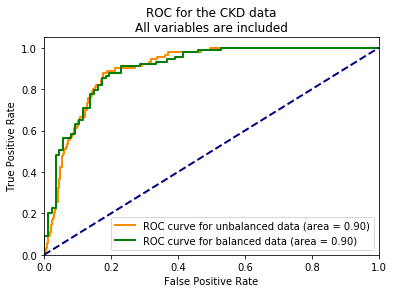

In [23]:
# For the entire variables
print('Figure 4.')
input_var  = set(df.columns) - set(['CKD','ID'])
ROC_CKD(input_var,'ROC for the CKD data\nAll variables are included')

Figure 5.


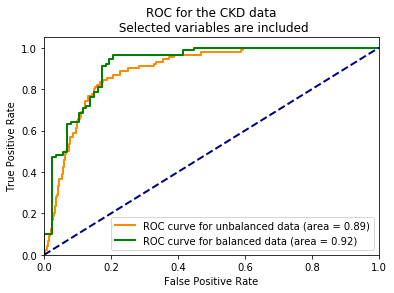

In [24]:
# For selected variables
print('Figure 5.')
input_var  = ['Diabetes', 'Hypertension', 'CHF', 'CVD', 'Stroke', 'PVD', 'Age', 
              'Female', 'Anemia',
              'Racegrp_hispa','Racegrp_other', 'Racegrp_white', 
              'Smoker', 'BMI', 'SBP']
ROC_CKD(input_var,'ROC for the CKD data\n Selected variables are included')

<h6> 3.2.Discussion on the Statistical Significance</h6>

In order to have a more convincing screening tool we need to comment on the statistical significance of contributing variables in the model. However, sklearn features we have used so far are primarily for classification performance rather than interpretability. Inevitably we use Logit estimator from Statsmodels package to have a sense of explanatory power of different variables. 

- #### Unbalanced sample
 - ##### All variables are included
   - As indicated in Table 6., <b> Female, Anemia, Hypertension, Diabetes, Activity, Waist, CVD, all classes of CareSource and Age</b> are the significant classifiers at 0.05 level, having <b>CareSource_DrHMO, Hypertension, Diabetes and Age</b> as the most significant ones.
       - The algorithm failed to generate outputs for LDL, HDL and Total Chol in this case.
 - ##### Selected variables are included
   - As indicated in Table 7., <b> Female, Hypertension, all classes of Racegrp, Smoker, BMI and SBP and Age</b> are the significant classifiers at 0.05 level, having <b>classes of Racegrp, Smoker, SBP, Female and Age</b> as the most significant ones.
       - Thus, <b> Diabetes and CVD</b> which appeared statistically significant in a model of all variables, aren't so when dimentionality is reduced.
       
- #### Bbalanced sample
 - ##### All variables are included
   - As indicated in Table 8., compared to Table 6<b>, Anemia, Activity, Waist, CVD, CareSource_clinic and CareSource_other</b> aren't anymore significant classifiers at 0.05 level. <b>Diabetes and Age</b> are still the most significant predictors.
       - The algorithm still failed to generate meaningful outputs for LDL, HDL and Total Chol.
 - ##### Selected variables are included
   - As indicated in Table 9., compared to Table 7<b>, Female, Hypertensions, Racegrp_white, Racegrp_other, BMI and SBP</b> aren't anymore significant classifiers at 0.05 level.<b> Racegrp_hispa, Smoker, Diabetes and Age</b> as the most significant predictors.
       - Thus, <b> Hypertension and Female</b> which appeared statistically significant in a model of all variables, aren't so when dimentionality is reduced. 
       
In conclusion, it can be said that: 

- **Age** has the most important classifying power in screening CKD-affected objects. This observation is in accordance with what we conjectured in the exploratory analysis section.

 - As the association is positive, older people are more likely to be screend as the ones with CKD. From the estimated coefficients, each year of increase in age increases this likelihood between 1.5 and 2 times. 

- Among the smaller set of variables, **Diabetes and CVD** become non-significant, regardless of the proportion of healthy and affected objects.  

 - When being significant, each year of increase in the measurement unit of these variables increases the chance of classifying the object in the CKD-affected class by around 60%.

- **Hypertension and gender** which appear with significant in models with selected variables, also become non-significant when the sample is getting balanced,thus being smaller.

 - When being significant, each year of increase in the measurement unit of hypertension increases the chance of classifying the object in the CKD-affected class between 80 and 90%. 
 
 - Gender (being female) doesn't show consistent association across two situations. When all variables are included, females seem to be around 70% more likely to be diagnosed with CKD while when variables are limited to those suggested by literature, females are 2 times less likely than males to be screened with positive result of CKD. 

- **LDL, HDL and Total Chol** don't represent a meaningful eplanatory power. 

- When sample is unbalanced and large, **Care source** is significant in the model containing the entire variables while **Race group** becomes significant when dimentionality is reduced. However, both variables become non-significant when sample gets balanced and smaller. However, exceptions are observed in some classes, including **hispanics**, and cases associated with **HMO plans or not identified sources (noplace)**.    

In [26]:
import statsmodels.api as sm

In [32]:
# Unbalanced sample
# All variables are included
input_var  = set(df_downsampled.columns) - set(['CKD','ID'])
X = df[input_var]
Y = df['CKD']
logit_model=sm.Logit(Y,X)
result=logit_model.fit()
print('Table 6. All variables are included and the sample is unbalanced.')
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.158867
         Iterations 10
Table 6. All variables are included and the sample is unbalanced.
                          Results: Logit
Model:               Logit            Pseudo R-squared: 0.334      
Dependent Variable:  CKD              AIC:              1386.1475  
Date:                2020-03-18 12:51 BIC:              1613.9369  
No. Observations:    4136             Log-Likelihood:   -657.07    
Df Model:            35               LL-Null:          -987.16    
Df Residuals:        4100             LLR p-value:      1.9644e-116
Converged:           1.0000           Scale:            1.0000     
No. Iterations:      10.0000                                       
-------------------------------------------------------------------
                    Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
-------------------------------------------------------------------
PoorVision          0.0207   0.2314   0.08

In [33]:
# Unbalanced sample
# Selected variables are included
input_var  = ['Diabetes', 'Hypertension', 'CHF', 'CVD', 'Stroke', 'PVD', 'Age', 
              'Female', 'Anemia',
              'Racegrp_hispa','Racegrp_other', 'Racegrp_white', 
              'Smoker', 'BMI', 'SBP']
X = df[input_var]
Y = df['CKD']
logit_model=sm.Logit(Y,X)
result=logit_model.fit()
print('Table 7. Selected variables are included and the sample is unbalanced.')
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.224898
         Iterations 8
Table 7. Selected variables are included and the sample is unbalanced.
                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.058     
Dependent Variable: CKD              AIC:              1890.3547 
Date:               2020-03-18 13:01 BIC:              1985.2670 
No. Observations:   4136             Log-Likelihood:   -930.18   
Df Model:           14               LL-Null:          -987.16   
Df Residuals:       4121             LLR p-value:      9.5094e-18
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     8.0000                                       
-----------------------------------------------------------------
                  Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
-----------------------------------------------------------------
Diabetes          0.1524   0.1705   0.8942 0.3712 -0.1817  0.

In [34]:
# Balanced sample
# All variables are included
input_var  = set(df_downsampled.columns) - set(['CKD','ID'])
X = df_downsampled[input_var]
Y = df_downsampled['CKD']
logit_model=sm.Logit(Y,X)
result=logit_model.fit()
print('Table 8. All variables are included and the sample is balanced.')
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.335610
         Iterations 10
Table 8. All variables are included and the sample is balanced.
                                  Results: Logit
Model:                    Logit                  Pseudo R-squared:       0.516     
Dependent Variable:       CKD                    AIC:                    429.0887  
Date:                     2020-03-18 13:18       BIC:                    583.0479  
No. Observations:         532                    Log-Likelihood:         -178.54   
Df Model:                 35                     LL-Null:                -368.75   
Df Residuals:             496                    LLR p-value:            1.2786e-59
Converged:                1.0000                 Scale:                  1.0000    
No. Iterations:           10.0000                                                  
-----------------------------------------------------------------------------------
                    Coef.   

In [35]:
# Balanced sample
# Selected variables are included
input_var  = ['Diabetes', 'Hypertension', 'CHF', 'CVD', 'Stroke', 'PVD', 'Age', 
              'Female', 'Anemia',
              'Racegrp_hispa','Racegrp_other', 'Racegrp_white', 
              'Smoker', 'BMI', 'SBP']
X = df_downsampled[input_var]
Y = df_downsampled['CKD']

logit_model=sm.Logit(Y,X)
result=logit_model.fit()
print('Table 9. Selected variables are included and the sample is balanced.')
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.377508
         Iterations 7
Table 9. Selected variables are included and the sample is balanced.
                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.455     
Dependent Variable: CKD              AIC:              431.6689  
Date:               2020-03-18 13:33 BIC:              495.8186  
No. Observations:   532              Log-Likelihood:   -200.83   
Df Model:           14               LL-Null:          -368.75   
Df Residuals:       517              LLR p-value:      3.8223e-63
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     7.0000                                       
-----------------------------------------------------------------
                   Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
-----------------------------------------------------------------
Diabetes           1.2869   0.3913  3.2892 0.0010  0.5201  2.05

## Concluding Remarks

In this last section, we want to further investigate the accuracy of our models, given insights we have gained so far.

Apparently, the notably small size of our dateset is a challenge for classification procedure. While we don't want to impute missing values of CKD column, which is the variable of interest, we can fit our models to a larger dataset by doing a simple imputation of missing records of different predictors. 

To do so, we choose to impute null values with the median of their associated variables because it is believed that median is a more robust indicator than mean. 

Lastly, we'd like to exclude variables this time to only parameters appeared with significant effect in the larger (unbalanced) sample based on predictions by the logit model. These variables include: **Age, Female, 'Diabetes', 'Hypertension', CVD, CareSource, Racegrp**.  

In [121]:
df0=ckd_dataset.dropna(how='any', subset=['CKD'])
len(df0)

6000

In [122]:
# Create dummy variables
dummy_cat_df = pd.get_dummies(df0[list(set(df0.dtypes[df0.dtypes == object].index))], drop_first=True)

# Adds the newly created dummy variables instead
df0= pd.concat([df0, dummy_cat_df], axis = 1)

# Drops categorical variables from the df
df0 = df0.drop(list(set(df0.dtypes[df0.dtypes == object].index)), axis = 1)

In [123]:
# Data imputation using median value
# extracts the numerical values
numerical_var = list(set(df0.columns) - set(df0.dtypes[df0.dtypes == object].index))

# Fills in the missing values in numerical columns with median and overwrites the result into the esxisting dataset
df0[numerical_var] = df0[numerical_var].fillna(df0[numerical_var].median(), inplace = False)

In [124]:
# Normalization
numerical_val=['Age','Weight','Height','BMI','Waist','SBP','DBP','HDL','LDL','Total Chol','Activity']
for i in numerical_val:
    df0[i]=(df0[i]-df0[i].mean())/df0[i].std()

In [131]:
# ID must be excluded from the analysis because obviously it doesn't have any exploratory power. 
input_var  = input_var  = ['Diabetes', 'Hypertension', 'CVD', 'Female', 'Age', 
              'CareSource_DrHMO','CareSource_clinic','CareSource_noplace','CareSource_other',
              'Racegrp_hispa','Racegrp_other', 'Racegrp_white']
X = df0[input_var]
Y = df0['CKD']

In [132]:
# Fitting models
lr, dt, rf, knn, X_test, Y_test = Screen_CKD(X,Y)

In [133]:
# Making predictions
pred_lr, pred_dt, pred_rf, pred_knn = Pred_CKD(lr, dt, rf, knn, X_test)

In [134]:
# Assessig performance
print('Table 10. Comparison between models when missing values are imputed in the origional data')
Perf_CKD(Y_test, pred_lr, pred_dt, pred_rf, pred_knn)

Table 10. Comparison between models when missing values are imputed in the origional data


,Accuracy,FPR,Precision,Recall,F1_Score
Logistic Regression,0.909091,0.008879,0.078652,0.466667,0.134615
Decision Trees,0.888889,0.036626,0.134831,0.266667,0.179104
Random Forest,0.910101,0.000555,0.005618,0.500000,0.011111
K-NN,0.898990,0.023307,0.112360,0.322581,0.166667


As indicated in Table 10, while random forest is barely affected in the new situation, incorporating limited number of variables in a larger dataset improves the FPR and recall ratios of all other models between 23% and 30%. 

More mportantly, logistic regression model now gets more closer to the random forest model which still ranks the first in terms of classification performance.

Although, as mentioned earlier, recent results are based on a simple data imputation procedure, refering to what we observed from the statistical significance, it can be concluded that the new set of variables are better screening tools for CKD diagnosis.  

### Suggestions for Future Studies

Because the study population is not a random sample of U.S. adults, any predictions suggested by current study requires further validation before utilizing for actual decision-making.

After dropping observations containing missing values of CKD (the variable of interest), data becomes notably small which may be a challange for the performance of ML algorithms. To address this limitation, we imputed null values by the median of their associated variables. However, there are different features in the sklearn package to do this task better and can be utilized for next studies.

We were interested in reducing dimentionality using PCA method. However, fewer components fail to explain a large portion of variance in the model. Functionality of PCA in larger datasets can be further studied.

Another helpful area to explore this dataset is the implementation of unsupervised ML techniques such as neural networks and hierarchical clustering to find out potential commonalities between healthy objects or those affected by CKD.